# 0. Preparing the Data Access and Processing

Using the imports as shown in pyriksdagen project from Google Colab. 

In [1]:
from lxml import etree
import progressbar
from pyparlaclarin.read import paragraph_iterator, speeches_with_name
from pyriksdagen.utils import protocol_iterators, download_corpus
import pyriksdagen
from pyriksdagen.metadata import load_Corpus_metadata
parser = etree.XMLParser(remove_blank_text=True)

Import the records corpus.

In [ ]:
print(pyriksdagen.__spec__)
download_corpus(partitions=["records"])

# 1. Metadata introduction

Extract important metadata to carry out the logic in our approach. 

In [2]:
df = load_Corpus_metadata("data")

Compiling metadata db from source.
                      person_id       start   end  \
0      i-PFAPNmRqeUAaxDzNRTG1x1        1867  1867   
1      i-QSYHiJ6G54WwZYYDpVnD4u        1867  1867   
2      i-Ddmtm1uG9esPH37c8XjUXZ        1867  1867   
3      i-65rmwEXkkhA1kxSrD4oMUw        1867  1867   
4      i-AvGpsGJvs5PXTcEG4DtbFt        1867  1867   
...                         ...         ...   ...   
13218  i-NHEfCn32mEHrAw3JbShLAA  2024-04-22   NaN   
13219  i-6GYXkbfSoUeH3CekfDuKLA  2024-05-01   NaN   
13220  i-3y4o8soU9qx5tQQ1cG92h3  2024-05-02   NaN   
13221   i-x1CuoKmRHYgQr9i2kh3B5         NaN   NaN   
13222  i-TUyWWYGDFXW92GhiG3CLwF         NaN   NaN   

                                    district                 role  
0          Eskilstuna och Strängnäs valkrets   andrakammarledamot  
1      Västra Götalands läns västra valkrets  förstakammarledamot  
2                      Torna härads valkrets   andrakammarledamot  
3                    Värmlands läns valkrets  förstakamm

In [3]:
df

,person_id,start,end,district,role,party,source,chamber,government,born,dead,gender,riksdagen_id,location,name,primary_name,party_abbrev,twitter
28354,i-122QwSSpyGJQiTJjmrUJCM,1992-03-17,1992-05-31,NaN,ledamot,Socialdemokraterna,member_of_parliament,0,NaN,1952-09-22,NaN,man,0573136138218,Västervik,krister örnfjäder,True,S,NaN
28355,i-122QwSSpyGJQiTJjmrUJCM,1992-03-17,1992-05-31,NaN,ledamot,Socialdemokraterna,member_of_parliament,0,NaN,1952-09-22,NaN,man,0573136138218,Västervik,örnfjäder,False,S,NaN
28431,i-122QwSSpyGJQiTJjmrUJCM,1992-11-26,1992-12-31,NaN,ledamot,Socialdemokraterna,member_of_parliament,0,NaN,1952-09-22,NaN,man,0573136138218,Västervik,krister örnfjäder,True,S,NaN
28432,i-122QwSSpyGJQiTJjmrUJCM,1992-11-26,1992-12-31,NaN,ledamot,Socialdemokraterna,member_of_parliament,0,NaN,1952-09-22,NaN,man,0573136138218,Västervik,örnfjäder,False,S,NaN
28444,i-122QwSSpyGJQiTJjmrUJCM,1993-01-11,1993-01-25,NaN,ledamot,Socialdemokraterna,member_of_parliament,0,NaN,1952-09-22,NaN,man,0573136138218,Västervik,krister örnfjäder,True,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26696,i-zC3ZtMw7pF7WxkXwbLkKZ,1986-01-10,1988-10-03,NaN,ledamot,Moderata samlingspartiet,member_of_parliament,0,NaN,1943-10-19,NaN,woman,0233182252702,Åkersberga,sundström,False,NaN,NaN
26994,i-zC3ZtMw7pF7WxkXwbLkKZ,1988-10-03,1989-01-10,Stockholms läns valkrets,ledamot,Moderata samlingspartiet,member_of_parliament,0,NaN,1943-10-19,NaN,woman,0233182252702,Åkersberga,gardner,False,NaN,NaN
26995,i-zC3ZtMw7pF7WxkXwbLkKZ,1988-10-03,1989-01-10,Stockholms läns valkrets,ledamot,Moderata samlingspartiet,member_of_parliament,0,NaN,1943-10-19,NaN,woman,0233182252702,Åkersberga,ingela gardner sundström,True,NaN,NaN
26996,i-zC3ZtMw7pF7WxkXwbLkKZ,1988-10-03,1989-01-10,Stockholms läns valkrets,ledamot,Moderata samlingspartiet,member_of_parliament,0,NaN,1943-10-19,NaN,woman,0233182252702,Åkersberga,kerstin ingela sundström,False,NaN,NaN


In [4]:
df["role"].unique()

array(['ledamot', 'lantförsvarsminister', 'försvarsminister',
       'utrikesminister', 'finansmarknadsminister', 'inrikesminister',
       'näringsminister', 'andre vice talman', 'förste vice talman',
       'vice talman', 'eu-minister', 'utrikeshandelsminister',
       'landsbygdsminister', 'jordbruksminister', 'civilminister',
       'konsultativt statsråd', 'ecklesiastikminister', 'socialminister',
       'kommunminister', 'kommunikationsminister',
       'minister för nordiskt samarbete',
       'statsministerns ställföretädare', 'handelsminister',
       'justitieminister', 'sjöförsvarsminister', 'finansminister',
       'biträdande finansminister', 'budgetminister', 'ekonomiminister',
       'socialförsäkringsminister', 'sjukvårdsminister',
       'samfundsminister', 'biståndsminister', 'migrationsminister',
       'invandrarminister', 'jämställdhetsminister', 'skolminister',
       'statsminister', 'infrastrukturminister',
       'biträdande jordbruksminister', 'folkhushållning

Generate a new variable called role cathegory to easily determine, if the person is a minister, MP or other. 

In [5]:
minister_roles = [
    'lantförsvarsminister', 'försvarsminister', 'utrikesminister',
    'finansmarknadsminister', 'inrikesminister', 'näringsminister',
    'eu-minister', 'utrikeshandelsminister', 'landsbygdsminister',
    'jordbruksminister', 'civilminister', 'socialminister',
    'kommunminister', 'kommunikationsminister', 'minister för nordiskt samarbete',
    'handelsminister', 'justitieminister', 'sjöförsvarsminister',
    'finansminister', 'biträdande finansminister', 'budgetminister',
    'ekonomiminister', 'socialförsäkringsminister', 'sjukvårdsminister',
    'samfundsminister', 'biståndsminister', 'migrationsminister',
    'invandrarminister', 'jämställdhetsminister', 'skolminister',
    'statsminister', 'infrastrukturminister', 'biträdande jordbruksminister',
    'folkhushållningsminister', 'energiminister', 'bostadsminister',
    'miljöminister', 'idrottsminister', 'skatteminister', 'löneminister',
    'arbetsmarknadsminister', 'utrikesstatsminister', 'biträdande bostadsminister',
    'kulturminister', 'biträdande justitieminister', 'minister för civilt försvar',
    'folkhälsominister', 'samordningsminister', 'arbetsrättsminister',
    'integrationsminister', 'konsumentminister', 'ungdomsminister',
    'klimatminister', 'utbildningsminister', 'digitaliseringsminister',
    'högskoleminister', 'vice statsminister', 'demokratiminister',
    'biträdande arbetsmarknadsminister', 'straffrättsminister',
    'biträdande socialminister', 'biträdande utbildningsminister',
    'minister för högre utbildning och forskning', 'planminister',
    'barnminister', 'biträdande industriminister', 'äldreminister',
    'socialtjänstminister'
]

mp_roles = ['ledamot']

other_non_questioning_roles = [
    'talman', 'förste vice talman', 'andre vice talman', 'vice talman',
    'konsultativt statsråd', 'statsministerns ställföretädare'
]

def categorize_role(role):
    if role in minister_roles:
        return 'minister'
    elif role in mp_roles:
        return 'mp'
    elif role in other_non_questioning_roles:
        return 'other'
    else:
        return 'unknown'

Choose the necessary columns and clean the dataset.

In [6]:
new_df = df[["person_id", "role"]].copy()
new_df["role_category"] = new_df["role"].apply(categorize_role)

In [7]:
new_df

,person_id,role,role_category
28354,i-122QwSSpyGJQiTJjmrUJCM,ledamot,mp
28355,i-122QwSSpyGJQiTJjmrUJCM,ledamot,mp
28431,i-122QwSSpyGJQiTJjmrUJCM,ledamot,mp
28432,i-122QwSSpyGJQiTJjmrUJCM,ledamot,mp
28444,i-122QwSSpyGJQiTJjmrUJCM,ledamot,mp
...,...,...,...
26696,i-zC3ZtMw7pF7WxkXwbLkKZ,ledamot,mp
26994,i-zC3ZtMw7pF7WxkXwbLkKZ,ledamot,mp
26995,i-zC3ZtMw7pF7WxkXwbLkKZ,ledamot,mp
26996,i-zC3ZtMw7pF7WxkXwbLkKZ,ledamot,mp


# 1. Implementation test

Code to scan unique sections of one file

In [8]:
from lxml import etree
from pyriksdagen.utils import corpus_iterator

In [9]:
protocols = list(corpus_iterator(document_type="prot", corpus_root="data/", start=1867, end=2023))
protocol_in_question = protocols[12]
parser = etree.XMLParser(encoding='utf-8')
root = etree.parse(protocol_in_question, parser).getroot()

In [10]:
NS = {"tei": "http://www.tei-c.org/ns/1.0"}

In [11]:
divs = root.findall(".//tei:text/tei:body//tei:div", namespaces=NS)
section_types = {div.attrib.get("type") for div in divs if div.attrib.get("type")}

In [12]:
print("Unique <div type=...> section types found:")
for t in sorted(section_types):
    print(f"- {t}")

Unique <div type=...> section types found:
- commentSection
- debateSection


Code to scan unique sections of all the files: 

In [26]:
from lxml import etree
from pyriksdagen.utils import corpus_iterator

def extract_all_div_types(corpus_root="data/", start=1867, end=2023):
    NS = {"tei": "http://www.tei-c.org/ns/1.0"}
    protocols = corpus_iterator(document_type="prot", corpus_root=corpus_root, start=start, end=end)
    
    all_section_types = set()

    for i, protocol_path in enumerate(protocols):
        try:
            parser = etree.XMLParser(encoding='utf-8')
            root = etree.parse(protocol_path, parser).getroot()
            divs = root.findall(".//tei:text/tei:body//tei:div", namespaces=NS)
            section_types = {div.attrib.get("type") for div in divs if div.attrib.get("type")}
            all_section_types.update(section_types)
        except Exception as e:
            print(f"Error parsing {protocol_path}: {e}")
            continue
        
        if i % 500 == 0:
            print(f"Processed {i} files...")

    return sorted(all_section_types)

In [25]:
extract_all_div_types() # Files to process: 17938

Processed 0 files...
Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...
Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...
Processed 7500 files...
Processed 8000 files...
Processed 8500 files...
Processed 9000 files...
Processed 9500 files...
Processed 10000 files...
Processed 10500 files...
Processed 11000 files...
Processed 11500 files...
Processed 12000 files...
Processed 12500 files...
Processed 13000 files...
Processed 13500 files...
Processed 14000 files...
Processed 14500 files...
Processed 15000 files...
Processed 15500 files...
Processed 16000 files...
Processed 16500 files...
Processed 17000 files...
Processed 17500 files...


['commentSection', 'debateSection']

Seems that the main sections are comment and debate sections. Inspecting some example files, we can note that the commentSection is a short overview of the protocol contents, and debateSection the actual part where the debates and Q&A sessions are held

In [37]:
utterances = root.findall(".//tei:u", namespaces=NS)

print("\nUtterances with IDs and links:")
for u in utterances:
    u_id = u.attrib.get("xml:id") or u.attrib.get("{http://www.w3.org/XML/1998/namespace}id")
    who = u.attrib.get("who")
    prev = u.attrib.get("prev")
    next_ = u.attrib.get("next")
    print(f"ID: {u_id}, who: {who}, prev: {prev}, next: {next_}")



Utterances with IDs and links:
ID: i-HoQq5gaYJ5z2XsaZqhAUe8, who: unknown, prev: None, next: None
ID: i-e1bac02d35b800f5-0, who: unknown, prev: None, next: None
ID: i-e1bac02d35b800f5-2, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: None, next: i-e1bac02d35b800f5-3
ID: i-e1bac02d35b800f5-3, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: i-e1bac02d35b800f5-2, next: i-e1bac02d35b800f5-4
ID: i-e1bac02d35b800f5-4, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: i-e1bac02d35b800f5-3, next: i-e1bac02d35b800f5-5
ID: i-e1bac02d35b800f5-5, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: i-e1bac02d35b800f5-4, next: i-e1bac02d35b800f5-6
ID: i-e1bac02d35b800f5-6, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: i-e1bac02d35b800f5-5, next: i-e1bac02d35b800f5-7
ID: i-e1bac02d35b800f5-7, who: i-HP26Ex6XfZD2gozC8P6pdm, prev: i-e1bac02d35b800f5-6, next: None
ID: i-e1bac02d35b800f5-8, who: i-F8qdE2eedz12PwFanq3ahv, prev: None, next: i-e1bac02d35b800f5-9
ID: i-e1bac02d35b800f5-9, who: i-F8qdE2eedz12PwFanq3ahv, prev: i-e1bac02d35b800f5-8, next: i-e1bac02d3

Example code for one protocol to test the parsing of speakers

In [48]:
protocols = list(corpus_iterator(document_type="prot", corpus_root="data/", start=1867, end=2023))
protocol_in_question = protocols[14823]
parser = etree.XMLParser(encoding='utf-8')
root = etree.parse(protocol_in_question, parser).getroot()

In [49]:
protocol_in_question

'data/200001/prot-200001--011.xml'

for one file

In [136]:
def parse_utterances(root, new_df):
    "function that finds the roles of the speakers present in the file with their order of speeches"
    NS = {"tei": "http://www.tei-c.org/ns/1.0"}

    def get_role(who_id):
        role = new_df.loc[new_df["person_id"] == who_id, "role_category"]
        return role.values[0].lower() if not role.empty else "unknown"

    all_utterances = []

    for section in root.findall(".//tei:div[@type='debateSection']", namespaces=NS):
        utterances = section.findall(".//tei:u", namespaces=NS)
        for u in utterances:
            u_id = u.attrib.get("xml:id") or u.attrib.get("{http://www.w3.org/XML/1998/namespace}id")
            who = u.attrib.get("who")
            role = get_role(who)

            all_utterances.append({
                "id": u_id,
                "who": who,
                "role": role,
            })

        all_utterances.append({
            "id": None,
            "who": None,
            "role": "section_break",
        })

    return all_utterances

def label_utterances_exact(utterances):
    labeled = []

    for i, utt in enumerate(utterances):
        role = utt["role"]
        who = utt["who"]

        if role == "section_break":
            labeled.append({**utt, "label": None})
            continue

        label = "question/remark"

        if role == "minister":
            label = "answer"
        else:
            for j in range(i + 1, len(utterances)):
                next_utt = utterances[j]
                if next_utt["role"] == "section_break":
                    label = "answer"
                    break
                elif next_utt["role"] == "mp" and next_utt["who"] != who:
                    label = "answer"
                    break
                elif next_utt["role"] == "minister":
                    break
                else:
                    continue

        labeled.append({**utt, "label": label})

    return [u for u in labeled if u["role"] != "section_break"]


In [137]:
parsed = parse_utterances(root, new_df)
labeled = label_utterances_exact(parsed)

In [138]:
labeled

[{'id': 'i-e1bac02d35b800f5-2',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-3',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-4',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-5',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-6',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-7',
  'who': 'i-HP26Ex6XfZD2gozC8P6pdm',
  'role': 'minister',
  'label': 'answer'},
 {'id': 'i-e1bac02d35b800f5-8',
  'who': 'i-F8qdE2eedz12PwFanq3ahv',
  'role': 'mp',
  'label': 'question/remark'},
 {'id': 'i-e1bac02d35b800f5-9',
  'who': 'i-F8qdE2eedz12PwFanq3ahv',
  'role': 'mp',
  'label': 'question/remark'},
 {'id': 'i-e1bac02d35b800f5-11',
  'who': 'i-F8qdE2eedz12PwFanq3ahv',
  'role': 'mp',
  'l

for the whole corpus

In [139]:
import os
import csv
from lxml import etree
from tqdm import tqdm

def parse_utterances(root, new_df):
    NS = {"tei": "http://www.tei-c.org/ns/1.0"}

    def get_role(who_id):
        role = new_df.loc[new_df["person_id"] == who_id, "role_category"]
        return role.values[0].lower() if not role.empty else "unknown"

    all_utterances = []

    for section in root.findall(".//tei:div[@type='debateSection']", namespaces=NS):
        utterances = section.findall(".//tei:u", namespaces=NS)
        for u in utterances:
            u_id = u.attrib.get("xml:id") or u.attrib.get("{http://www.w3.org/XML/1998/namespace}id")
            who = u.attrib.get("who")
            role = get_role(who)

            all_utterances.append({
                "id": u_id,
                "who": who,
                "role": role,
            })

        all_utterances.append({
            "id": None,
            "who": None,
            "role": "section_break",
        })

    return all_utterances

def label_utterances_exact(utterances):
    labeled = []

    for i, utt in enumerate(utterances):
        role = utt["role"]
        who = utt["who"]

        if role == "section_break":
            labeled.append({**utt, "label": None})
            continue

        label = "question/remark"
        if role == "minister":
            label = "answer"
        else:
            for j in range(i + 1, len(utterances)):
                next_utt = utterances[j]
                if next_utt["role"] == "section_break":
                    label = "answer"
                    break
                elif next_utt["role"] == "mp" and next_utt["who"] != who:
                    label = "answer"
                    break
                elif next_utt["role"] == "minister":
                    break

        labeled.append({**utt, "label": label})

    return [u for u in labeled if u["role"] != "section_break"]

def extract_year_from_path(filepath):
    filename = os.path.basename(filepath)
    year_str = filename.split("-")[1][:4]
    return int(year_str)

def process_protocols(new_df, protocols, output_csv="identified_answers.csv"):
    parser = etree.XMLParser(encoding='utf-8')
    answers = []

    for path in tqdm(protocols):
        try:
            root = etree.parse(path, parser).getroot()
            year = extract_year_from_path(path)

            utterances = parse_utterances(root, new_df)
            labeled = label_utterances_exact(utterances)

            for utt in labeled:
                if utt["label"] == "answer":
                    answers.append({
                        "utterance_id": utt["id"],
                        "year": year,
                        "who": utt["who"],
                        "role": utt["role"]
                    })
        except Exception as e:
            print(f"Failed on {path}: {e}")

    # Save to CSV
    with open(output_csv, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=["utterance_id", "year", "who", "role"])
        writer.writeheader()
        writer.writerows(answers)


In [141]:
from pyriksdagen.utils import corpus_iterator

protocols = list(corpus_iterator(document_type="prot", corpus_root="data/", start=1867, end=2023))
process_protocols(new_df, protocols, output_csv="identified_answers.csv")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17938/17938 [4:48:04<00:00,  1.04it/s]


In [145]:
import pandas as pd
from tqdm import tqdm

def count_distinct_answers_with_progress(csv_path):
    df = pd.read_csv(csv_path)

    def split_id(utt_id):
        if pd.isna(utt_id):
            return None, None
        if '-' in utt_id:
            prefix, suffix = utt_id.rsplit('-', 1)
            if suffix.isdigit():
                return prefix, int(suffix)
        return utt_id, None

    df = df.sort_values(by=["year", "utterance_id"]).reset_index(drop=True)

    counts = {}
    prev = None
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Counting answers"):
        year = row["year"]
        who = row["who"]
        role = row["role"]
        utt_id = row["utterance_id"]

        prefix, suffix = split_id(utt_id)
        counts.setdefault(year, 0)

        if prev is None:
            counts[year] += 1
            prev = (prefix, suffix, who, role)
            continue

        prev_prefix, prev_suffix, prev_who, prev_role = prev

        if who != prev_who or role != prev_role:
            counts[year] += 1
        elif prefix != prev_prefix:
            counts[year] += 1
        else:
            if suffix is None or prev_suffix is None or suffix != prev_suffix + 1:
                counts[year] += 1
            else:
                pass

        prev = (prefix, suffix, who, role)

    return counts

In [146]:
csv_file = "identified_answers.csv"
answer_counts = count_distinct_answers_with_progress(csv_file)

print("Distinct answer counts per year:")
for year, count in sorted(answer_counts.items()):
    print(f"{year}: {count}")

Counting answers: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4160226/4160226 [02:57<00:00, 23395.20it/s]


Distinct answer counts per year:
1867: 17052
1868: 17024
1869: 16985
1870: 14588
1871: 18993
1872: 15381
1873: 16877
1874: 13219
1875: 20331
1876: 18431
1877: 18539
1878: 19453
1879: 15934
1880: 16197
1881: 11850
1882: 17133
1883: 16131
1884: 12199
1885: 15902
1886: 17275
1887: 12881
1888: 16047
1889: 18360
1890: 15706
1891: 14517
1892: 17095
1893: 13708
1894: 17022
1895: 15607
1896: 16740
1897: 15838
1898: 17073
1899: 13068
1910: 24657
1911: 25990
1912: 25587
1913: 26931
1914: 22027
1915: 20618
1916: 20049
1917: 27072
1918: 32178
1919: 31716
1924: 1335
1951: 77
1971: 13328
1972: 15772
1973: 14403
1974: 12195
1975: 41974
1976: 29940
1977: 30303
1978: 19067
1979: 16946
1980: 14982
1981: 16484
1982: 14716
1983: 16206
1984: 16242
1985: 15018
1986: 16004
1987: 16317
1988: 16178
1989: 16798
1990: 40501
1991: 39309
1992: 43599
1993: 40435
1994: 30515
1995: 25203
1996: 32379
1997: 34611
1998: 28975
1999: 33556
2000: 34992
2001: 35294
2002: 30350
2003: 23936
2004: 27946
2005: 25708
2006: 26899

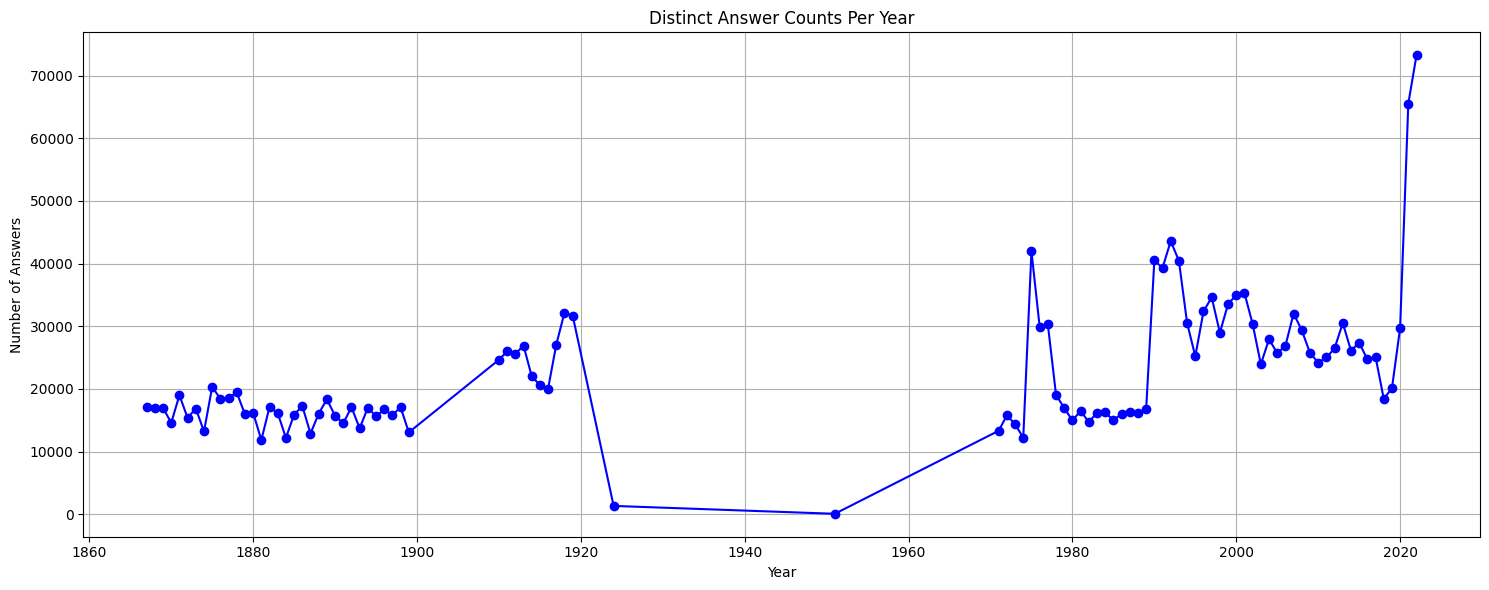

In [150]:
import matplotlib.pyplot as plt

years = sorted(answer_counts.keys())
counts = [answer_counts[year] for year in years]

plt.figure(figsize=(15,6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')

plt.title("Distinct Answer Counts Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Answers")
plt.grid(True)
plt.tight_layout()

plt.savefig("answer_counts_per_year.png")